# nCov2019数据分析

## 数据来源

本数据来源于[2019新型冠状病毒疫情时间序列数据仓库](https://github.com/BlankerL/DXY-2019-nCoV-Data)，其数据来源为[丁香园](https://3g.dxy.cn/newh5/view/pneumonia)。

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_util
import plot_util

from IPython.display import display, Markdown

In [5]:
city_name = '深圳'

In [6]:
display(Markdown('## ' + city_name + '数据'))

## 深圳数据

In [7]:
raw_data = data_util.load_data()

In [8]:
display(Markdown('### ' + city_name + '累计数量'))

### 深圳累计数量

In [9]:

city_daily_data = data_util.aggregate_daily(raw_data, city_name)
city_daily_data = data_util.calculate_dead_cured_rate(city_daily_data)
city_daily_data.tail(5)

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7982,广东省,深圳,271,0,13,0,2020-02-04 20:55:16.467,2020-02-04,0.0,4.797048
5751,广东省,深圳,291,0,16,0,2020-02-05 21:18:47.516,2020-02-05,0.0,5.498282
3481,广东省,深圳,316,0,22,0,2020-02-06 20:40:40.766,2020-02-06,0.0,6.962025
1169,广东省,深圳,339,0,31,0,2020-02-07 18:14:50.649,2020-02-07,0.0,9.144543
166,广东省,深圳,351,0,31,0,2020-02-08 09:33:34.004,2020-02-08,0.0,8.831909


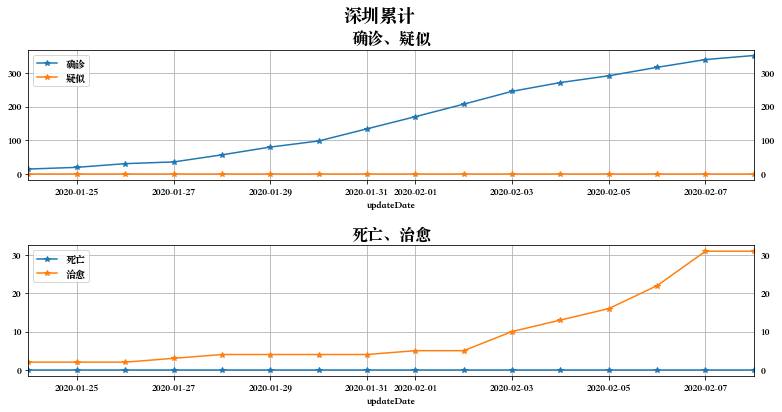

In [10]:
figure = plot_util.plot_conf_main(city_daily_data, city_name + '累计')

In [11]:
display(Markdown('### ' + city_name + '增长速度'))

### 深圳增长速度

In [12]:
city_daily_data_1st_derivative = data_util.diff(city_daily_data)
city_daily_data_1st_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7982,广东省,深圳,26.0,0.0,3.0,0.0,2020-02-04 20:55:16.467,2020-02-04,0.0,0.715415
5751,广东省,深圳,20.0,0.0,3.0,0.0,2020-02-05 21:18:47.516,2020-02-05,0.0,0.701234
3481,广东省,深圳,25.0,0.0,6.0,0.0,2020-02-06 20:40:40.766,2020-02-06,0.0,1.463744
1169,广东省,深圳,23.0,0.0,9.0,0.0,2020-02-07 18:14:50.649,2020-02-07,0.0,2.182517
166,广东省,深圳,12.0,0.0,0.0,0.0,2020-02-08 09:33:34.004,2020-02-08,0.0,-0.312634


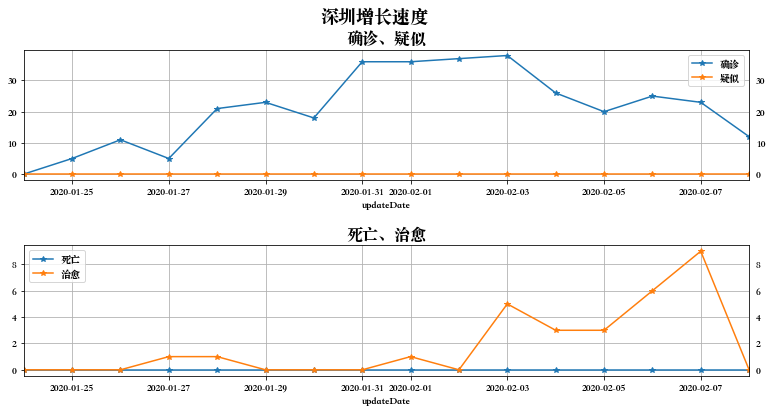

In [13]:
figure = plot_util.plot_conf_main(city_daily_data_1st_derivative, city_name + '增长速度')

In [15]:
display(Markdown('### ' + city_name + '增长加速度'))

### 深圳增长加速度

In [14]:
city_daily_data_2nd_derivative = data_util.diff(city_daily_data_1st_derivative)
city_daily_data_2nd_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
7982,广东省,深圳,-12.0,0.0,-2.0,0.0,2020-02-04 20:55:16.467,2020-02-04,0.0,-0.950758
5751,广东省,深圳,-6.0,0.0,0.0,0.0,2020-02-05 21:18:47.516,2020-02-05,0.0,-0.014182
3481,广东省,深圳,5.0,0.0,3.0,0.0,2020-02-06 20:40:40.766,2020-02-06,0.0,0.762510
1169,广东省,深圳,-2.0,0.0,3.0,0.0,2020-02-07 18:14:50.649,2020-02-07,0.0,0.718774
166,广东省,深圳,-11.0,0.0,-9.0,0.0,2020-02-08 09:33:34.004,2020-02-08,0.0,-2.495151


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


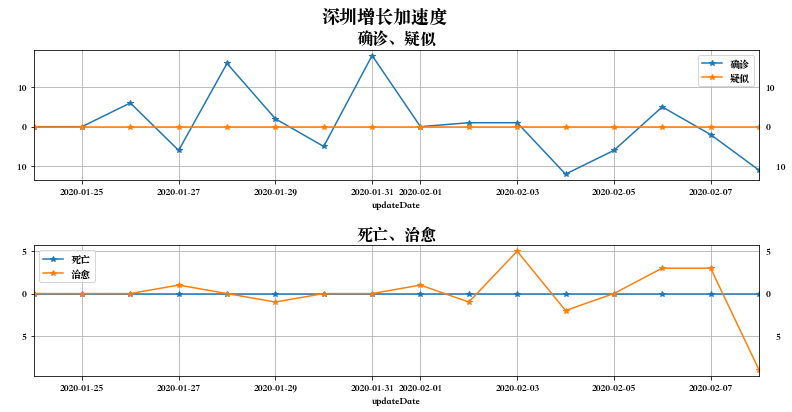

In [17]:
figure = plot_util.plot_conf_main(city_daily_data_2nd_derivative, city_name + '增长加速度')

In [16]:
display(Markdown('### ' + city_name + '死亡治愈率'))

### 深圳死亡治愈率

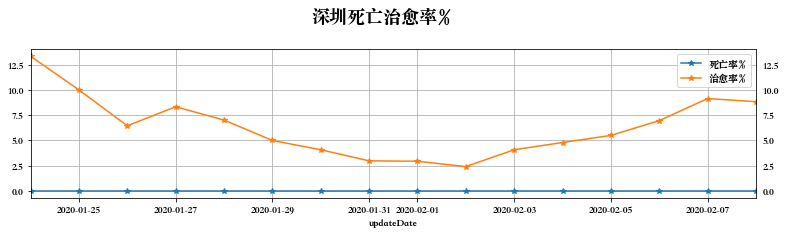

In [18]:
figure = plot_util.plot_conf_dead_cured_ratio(city_daily_data, city_name + '死亡治愈率%')

In [19]:
black_province_name = '湖北省'

In [20]:
display(Markdown('## 全国数据（除' + black_province_name + '）'))

## 全国数据（除湖北省）

In [21]:
display(Markdown('因' + black_province_name + '灾情特别严重且现已隔离（' + black_province_name + '加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。'))

因湖北省灾情特别严重且现已隔离（湖北省加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。

In [22]:
display(Markdown('## 全国累计（除' + black_province_name + '）'))

## 全国累计（除湖北省）

In [23]:
white_daily_data = data_util.aggregate_daily_except(raw_data, province_name=black_province_name)
white_daily_data = data_util.calculate_dead_cured_rate(white_daily_data)

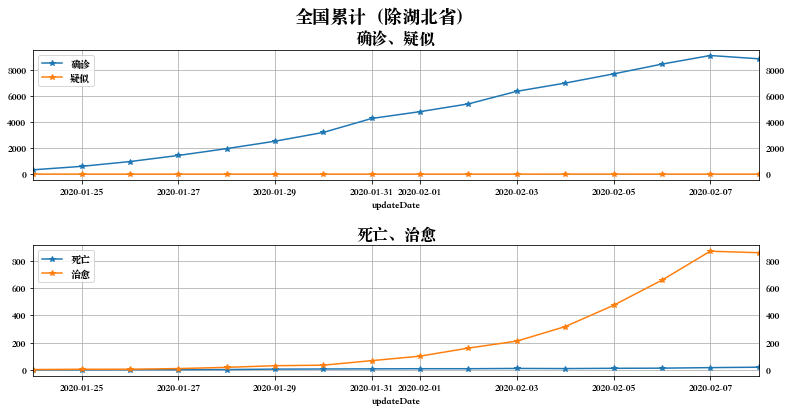

In [24]:
figure = plot_util.plot_conf_main(white_daily_data, '全国累计（除' + black_province_name + '）')

In [26]:
display(Markdown('## 全国增长速度（除' + black_province_name + '）'))

## 全国增长速度（除湖北省）

In [25]:
white_daily_data_1st_derivative = data_util.diff(white_daily_data)
white_daily_data_1st_derivative.tail()

,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,
2020-02-04,629.0,2.0,106.0,-1.0,-0.031389,1.218453
2020-02-05,704.0,0.0,156.0,2.0,0.011587,1.613539
2020-02-06,750.0,-2.0,184.0,1.0,-0.003200,1.633704
2020-02-07,660.0,0.0,212.0,4.0,0.031948,1.765627
2020-02-08,-251.0,0.0,-11.0,3.0,0.039569,0.147383


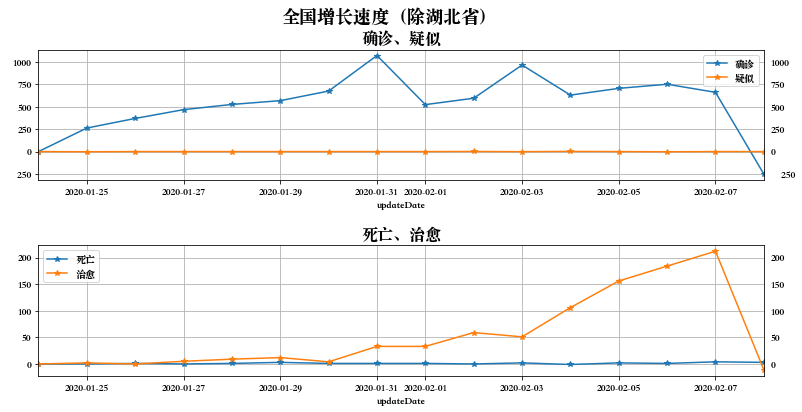

In [27]:
figure = plot_util.plot_conf_main(white_daily_data_1st_derivative, '全国增长速度（除' + black_province_name + '）')

In [28]:
display(Markdown('## 全国增长加速度（除' + black_province_name + '）'))

## 全国增长加速度（除湖北省）

In [29]:
white_daily_data_2nd_derivative = data_util.diff(white_daily_data_1st_derivative)
white_daily_data_2nd_derivative.tail()

,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,
2020-02-04,-335.0,3.0,55.0,-3.0,-0.034680,0.869219
2020-02-05,75.0,-2.0,50.0,3.0,0.042976,0.395086
2020-02-06,46.0,-2.0,28.0,-1.0,-0.014786,0.020165
2020-02-07,-90.0,2.0,28.0,3.0,0.035148,0.131923
2020-02-08,-911.0,0.0,-223.0,-1.0,0.007620,-1.618244


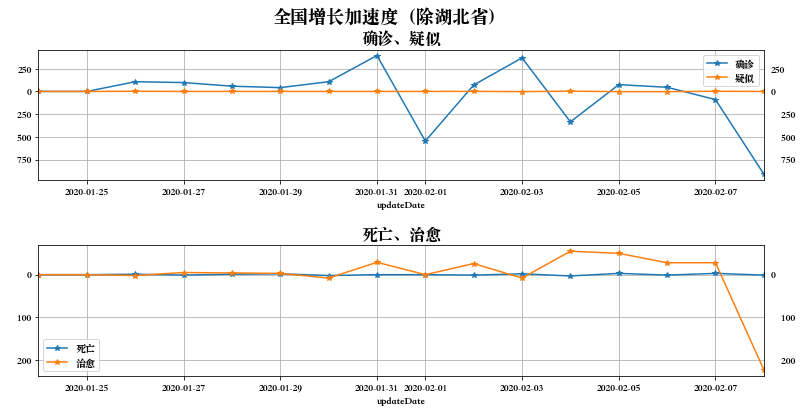

In [31]:
figure = plot_util.plot_conf_main(white_daily_data_2nd_derivative, '全国增长加速度（除' + black_province_name + '）')

In [32]:
display(Markdown('## 全国增死亡治愈率（除' + black_province_name + '）'))

## 全国增死亡治愈率（除湖北省）

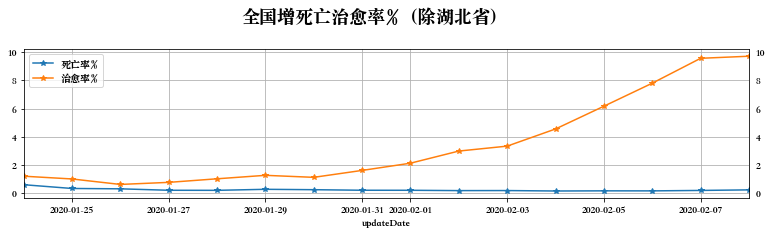

In [33]:
figure = plot_util.plot_conf_dead_cured_ratio(white_daily_data, '全国增死亡治愈率%（除' + black_province_name + '）')